# Talal Notes for chapter 7 ISE291

<mark> **These notes are not to undermine the importance of the course slides, but rather provide extra help for understanding and applying code and explain the concept in a simplified manner!**</mark>
    
<span style = 'color:#ec042d'> **Please review the course material for a more detailed understanding** </span>

# Linear Regression

- Predict the value of a dependent variable based on the value of at least one independent variable
- Explain the impact of changes in an independent variable on the dependent variable

## In Single Linear Regression (SLR) or (Single Input Single Output SISO)

- Only one independent variable, X
- Relationship between X and Y is described by a linear function
- Changes in Y are assumed to be related to changes in X

<img src="img/ISE291_CH7_IMG1.png" width=440 height=110/>
<img src="img/ISE291_CH7_IMG2.png" width=440 height=110/>
<img src="img/ISE291_CH7_IMG3.png" width=440 height=110/>
<img src="img/ISE291_CH7_IMG4.png" width=440 height=110/>

$$ \beta_1 = r \frac{sd_y}{sd_x} $$ and $$ \beta_0 = \overline{y} - \beta_1 \overline{x} $$
where $r$ is the Pearson's correlation coefficient, $sd_x$ and $sd_y$ represent the standard deviation of $x$ and $y$ variables respectively, $\overline{x}$ and $\overline{y}$ represent the means of $x$ and $y$ variables respectively.

### <mark>Please remember that in chapter 6 there is a video that explained how to get the correlation coefficient.</mark>

At the exact same moment we can see 𝛽1 and 𝛽0

From this video @ [2:21], https://www.youtube.com/watch?v=ttTO7CetjVk

<Figure size 432x288 with 0 Axes>

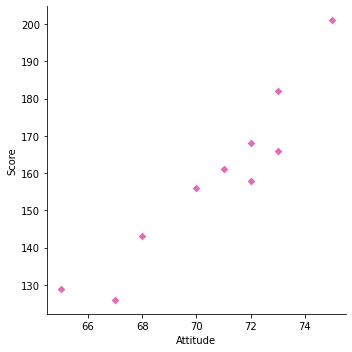

In [1]:
#Visualize the relationship between Attitude and Score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/Regression-1.csv', delimiter =',')
plt.figure()
sns.relplot(x='Attitude', y='Score',
            color = '#e06cba', marker = 'D',
            kind='scatter',
            data=df)
plt.xlabel('Attitude')
plt.ylabel('Score')
plt.show()

### <mark>There exists a linear relation between the two variables and it seems to also be a strong linear relation</mark>

In [2]:
display(df.iloc[:,1:]) ## Use your calculator to get our coefficients (r, 𝛽1, and 𝛽0)

,Attitude,Score
0,65,129
1,67,126
2,68,143
3,70,156
4,71,161
5,72,158
6,72,168
7,73,166
8,73,182
9,75,201


### <mark>Using "from sklearn.linear_model import LinearRegression", get the needed coefficients</mark>

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
reg = LinearRegression(fit_intercept=True)
reg.fit(df[['Attitude']], df['Score'])

print(f'Beta1, the slope is {np.round(reg.coef_,2)[0]}; and Beta0, the intercept is {np.round(reg.intercept_,2)}')

Beta1, the slope is 6.93; and Beta0, the intercept is -330.46


## <mark>This type of regression is called Ordinary Least Square (OLS) regression.</mark>

## Our prediction model should look like this
$$\hat{y} =-330.46 + 6.93 {x}$$

## Now we can estimate/predict the output for values that are not in our data

Question: Predict the score of an attitude of 80

In [4]:
print(np.round(reg.predict(np.array(80).reshape(1, -1)),2)) #single value or single record, we need the .reshape() method 

[224.17]


C:\Users\Talal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
### For multible predictions of x

x_new = [78,74,68,69] ## Define a list of your x values that you want to predict the output for
y_new = reg.predict(np.array(x_new).reshape(-1, 1))  #single column
print(f'The estimated scores for the students with attiudes of {x_new} are {np.round(y_new,2).tolist()} respectively .')

The estimated scores for the students with attiudes of [78, 74, 68, 69] are [210.3, 182.57, 140.97, 147.91] respectively .


C:\Users\Talal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Gradient Descent for Single Linear Regression

- Gradient Descent is an optimization algorithm that tries to find the best parameters that minimize the model's cost function (error function)
    - for a given value of 𝛽1 and 𝛽0, the error function returns an error value based on how well the line fits our data. 
- Please focus on the differences between the cost function that is used in our Gradient Descent algorithm, and the way Gradient Descent is formulated.

- Cost function >> $$ \epsilon = \frac{1}{n} \sum_{i=1}^n ((\beta_1x_i +\beta_0)-y_i)^2.$$

- We need to use partial derivatives w.r.t $\beta_1$ and $\beta_0$ that are:

$$ 
\frac{\partial \epsilon}{\partial \beta_1} = \frac{2}{n}\sum_{i=1}^n ((\beta_1x_i +\beta_0)-y_i)x_i,
$$

$$ 
\frac{\partial \epsilon}{\partial \beta_0} = \frac{2}{n}\sum_{i=1}^n ((\beta_1x_i +\beta_0)-y_i).
$$

The algorithm is as follows:


$\quad$ Initialize:  
$\quad$$\quad$ Start with **random** $\beta_1$ and $\beta_0$ values, say $\beta_1^{old}$ and $\beta_0^{old}$.  
$\quad$$\quad$ Calculate $\epsilon^{old} (error)$  
$\quad$ repeat {  
$\quad$$\quad$ Update:  
$\quad$$\quad$$\quad$ $ \beta_1^{new} = \beta_1^{old} - \lambda \frac{2}{n}\sum_{i=1}^n ((\beta_1^{old} x_i +\beta_0^{old})-y_i)x_i$   <span style = 'color:#ec042d'>**Notice the partial derivative term that is used here that has been defined above**</span>

$\quad$$\quad$$\quad$ $ \beta_0^{new} = \beta_0^{old} - \lambda \frac{2}{n}\sum_{i=1}^n ((\beta_1^{old} x_i +\beta_0^{old})-y_i)$  
$\quad$$\quad$$\quad$ Calculate $\epsilon^{new}$  
$\quad$ } until ($\epsilon^{new}$ >= $\epsilon^{old}$)

In the above algorithm $\lambda>0$ is step size, or sometimes called the learning rate, and is usually selected as a small number.

In [30]:
# Implementation of gradient descent method.

def error_function(x,y,b0,b1):
    e=0
    for i,yi in enumerate(y): ## Since we iterate over the values of y we don't need to use y[i], although we can use it
        e += ((b1*x[i]+b0) - yi)**2
    return e/len(y)

def partial_b1(x,y,b0,b1):
    e=0
    for i,xi in enumerate(x): ## We iterate this time over values of x, so now we use y[i], this note is to not confuse about yi
        e += ((b1*xi+b0) - y[i])*xi
    return 2*e/len(y)

def partial_b0(x,y,b0,b1):
    e=0
    for i,yi in enumerate(y):
        e += ((b1*x[i]+b0) - yi)
    return 2*e/len(y)

# Given

df = pd.read_csv('data/Regression-2.csv', delimiter =',')
x = df['x'].values
y = df['y'].values

#initialize
b1_Old = 10
b0_Old = 10
mse_Old = error_function(x,y,b0_Old,b1_Old) 
lam = 0.005
print('Initial Values:', b0_Old, b1_Old, mse_Old,'\n')
##repeate
i = 0
while True:
    i+=1
    b1_New = b1_Old - lam * partial_b1(x,y,b0_Old,b1_Old) ## (2/n) * the summation term is defined in the functions above
    b0_New = b0_Old - lam * partial_b0(x,y,b0_Old,b1_Old)
    mse_New = error_function(x,y,b0_New,b1_New)
    if mse_New >= mse_Old:
        b0_New,b1_New,mse_New = b0_Old,b1_Old,mse_Old
        break
    else:
        b0_Old,b1_Old,mse_Old = b0_New,b1_New,mse_New  
      
print('Final values:', b0_New, b1_New, mse_New)

Initial Values: 10 10 8210.8 

Final values: -10.263152927431642 3.977443244976516 32.53308270677262


### <mark>Here are some easy steps to follow to understand gradient descent</mark>

- (1) Initialize values for  $\beta_1$ and $\beta_0$
- (2) Calculate the error function using the initialized  $\beta_1$ and $\beta_0$
- (3) In the loop, we update values of B0 and B1. 
    - we then calculate a new error function.
    - If our **NEW** error function is less than our **OLD** error function, this means we are going into the right direction of minimizing our error function, we **continue** our loop.
    - Our new values become our old values. This is done to calculate the newer values.
    - If our **OLD** error function is less than our **NEW** function, this means we need to stop our loop, minimization is not guaranteed.
    - We want to bring back our values that had the minimum error, so we assign our **NEW** values to our **OLD** values that had the minimum function.

# Multiple Linear Regression (MLR) or (Multiple Input Single Output MISO)

In this chapter, for MLR, we are only considered with the following:

- Closed Form Solution for MISO Linear Regression (parameters of MLR)
- How to get parameters using python libraries
- The definition of gradient descent for MLR

The closed form looks like this>> $$(\mathbf{X^{T}X})^{-1} \mathbf{X^{T}y}$$

where $\mathbf{X} \in \mathbb{R}^{n \times (P+1)}$, each column of $\mathbf{X}$ represent an input variable, the first column of $\mathbf{X}$ contains all ones, and $\mathbf{y} \in  \mathbb{R}^{n}$ represents the column containing output variable. 

In [32]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/Regression-3.csv', delimiter =',')

display(df)

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-1.834631
...,...,...,...,...,...,...,...,...,...
92,1.262444,0.580608,0.558151,-1.030029,1.902379,1.079149,0.344407,1.269449,1.660415
93,2.107397,0.628738,-2.682185,-1.030029,1.902379,1.688267,0.344407,0.556647,1.921044
94,1.328267,-0.546127,-1.602073,-1.030029,1.902379,1.900197,0.344407,-0.512556,2.320465
95,1.307045,0.340141,0.558151,1.010033,1.902379,1.249088,0.344407,1.982251,2.611649


### We can see clearly our output column here, "y"

In [33]:
display(df.corr()) ## Notice the diagonal of 1s

,x1,x2,x3,x4,x5,x6,x7,x8,y
x1,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
x2,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
x3,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
x4,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
x5,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
x6,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
x7,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
x8,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
y,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


In [39]:
## Implementation of closed form

Xo = df.iloc[:,0:-1].values ## column -1 is not inculded, therefore we took only our x columns
y = df.iloc[:,-1].values
X = np.c_[np.ones(len(df.index)), Xo] 
## Remember that the X we want contains all ones in its first column, this is how we add it

best_beta = np.linalg.inv(X.T @ X) @ X.T @ y

print('The closed form estimates are:', np.round(best_beta,2).tolist()) 

The closed form estimates are: [-0.0, 0.58, 0.23, -0.14, 0.12, 0.27, -0.13, 0.03, 0.11]


In [40]:
# Calculate the coefficient estimates using scikit learn LinearRegression module. 
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(Xo, y)

best_beta =  np.round(reg.coef_,2)
best_beta_0 = np.round(reg.intercept_,2)

print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())

The best values for the estimates are : -0.0 [0.58, 0.23, -0.14, 0.12, 0.27, -0.13, 0.03, 0.11]


# Penalized Linear Regression (PLR)

### The following notes are all from course notes, please read them carefully, and focus on the differences between the Ridge and Lasso regression >> $$\beta_j^2 and |\beta_j|$$
- The coefficients obtained by minimizing the squared error of the training data, may not perform in general good on the new data.
- This phenomenon is called as **over-fitting**.
- In order to control over-fitting, a penalized term (or regularization term) is added to the _error function_. 
- The aim of the penalized function is to set some of the coefficients to zero.

- In PLR, the least square error function will be updated as follows:
 $$J(\boldsymbol \beta) = \frac{1}{n} \sum_{i=1}^n\left( h(x^i)-y_i \right)^2 + \alpha P(\boldsymbol \beta),$$
 
 where $P(\boldsymbol \beta)$ is the penalty or regularized term, and $\alpha$ is the regularization coefficient.
- In our class, we will look at the following two popular penalization linear regression models:
 - Ridge regression:
 $$\frac{1}{n} \sum_{i=1}^n\left( h(x^i)-y_i \right)^2 + \alpha \sum_{j=0}^P \beta_j^2$$
 - LASSO regression:
  $$\frac{1}{n} \sum_{i=1}^n\left( h(x^i)-y_i \right)^2 + \alpha \sum_{j=0}^P |\beta_j|$$

## Notes

<span style = 'color:#038eff'>
    
In **Ridge** regression a closed form solution exists, given as 𝜷∗=(𝐗𝐓𝐗+𝛼𝐈)−1𝐗𝐓𝐲

In **Lasso**, no closed form solution, but many efficient algorithms exists.
</span>

In [42]:
# Find the coefficient estimates using Ridge regression for  𝑎𝑙𝑝ℎ𝑎=500 , using sci-kit learn.
import pandas as pd
df = pd.read_csv('data/Regression-3.csv', delimiter =',')

Xo = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

from sklearn.linear_model import Ridge
regr = Ridge(alpha=500)
regr.fit(Xo, y)
best_beta =  np.round(regr.coef_,2)
best_beta_0 = np.round(regr.intercept_,2)
print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())

The best values for the estimates are : -0.0 [0.1, 0.06, 0.01, 0.02, 0.07, 0.06, 0.04, 0.04]


In [43]:
# Find the coefficient estimates using Lasso regression for  𝑎𝑙𝑝ℎ𝑎=0.5 , using sci-kit learn.
from sklearn.linear_model import Lasso
regl = Lasso(alpha=0.5)
regl.fit(Xo, y)
best_beta =  np.round(regl.coef_,2)
best_beta_0 = np.round(regl.intercept_,2)
print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())

The best values for the estimates are : -0.0 [0.23, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]




- OLS vs Ridge: OLS and Ridge have all non-zero coefficients. However, the coefficients given by Ridge are less in terms of absolute value (shrunken coefficients)

- OLS vs Lasso: OLS has all non-zero coefficients, whereas Lasso has ONE non-zero coefficients (selected coefficient). Thus, Lasso claims that only the first column is relevant to the output variable, for alpha=0.5.

### Lasso vs Ridge: Summary

### Important to read!

- Ridge regression shrinks the estimate values, it is useful when there are **correlated input columns**.
- Lasso does feature selection, it is useful when there are **unrelated input columns**.
- The quality of solution depends on the value of the hyper-parameter $\alpha$
- Selecting the best value of $\alpha$ generates better results than OLS! 

# Train-Testing vs Cross-validation (CV)

**Train-Testing:**
- The aim is to test the model's __generalizability__.
 - to goal is to reduce the level of overfitting.
 - the training is done a little bit more rigorously.
 - validation set is for validating the model's accuracy before the actual test on testing data.
 
**Cross-validation (CV):**
- It is used when there is no predefined training/validation/testing data.
- The idea is to partition the data into training/validation/testing sets.
- The aim is to improve the model's __generalizability__.

## <mark> More on Train-Testing & Cross-validation (CV)</mark>

### Please read!

We train (fit) on the **Training** data, and we predict on a separate **Testing** data

We use **Train** data **AND** **Cross-Validation** data to get the best value alpha ($\alpha$)

*Differences between Test Train-Testing & Cross-validation are*:

- Train-Testing  $\rightarrow$ The testing and training data are already given
- CV $\rightarrow$ We **randomly** generate the training and testing data from a single given dataframe(*DF*)

### Please go to course slides for the case study.

### Here are some notes about it

X = df.iloc[:,:-1].values

y = df.iloc[:, -1].values 

X_train, X_test, y_train, y_test = <span style = 'color:#ec042d'>train_test_split(X, y, test_size=0.3, random_state=42)</span>

-
- We usually split the data into 30% for testing and 70% for training, or 25% and 75%. Make sure the training has the larger split
- Controls the shuffling applied to the data before applying the split, Keep the random state at 42

### After we have our training and testing splits, we need to scale/normalize them

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])

X_train = A_train[:,:-1]

y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])

X_test = A_test[:,:-1]

y_test = A_test[:,-1]

### “Success is no accident. It is hard work, perseverance, learning, studying, sacrifice, and most of all, love of what you are doing or learning to do.” ― Pele

### For any questions please contact me:

E-mail: 202036240@kfupm.edu.sa

LinkedIn: https://www.linkedin.com/in/talal-harbi

Twitter: TalalkhaledHr